In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ratings = pd.read_csv(r'D:\videos pgp\ML(or)DL\SL - Projects\1567507480_amazonmoviesandtvratings\ratings.csv')
ratings.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
n_users = len(ratings.user_id.unique())
n_users

4848

In [5]:
n_movies = len(ratings.columns)
n_movies

207

In [6]:
ratings.shape

(4848, 207)

In [7]:
for i in range(1,ratings.shape[1]):
    ratings[ratings.columns[i]]=ratings[ratings.columns[i]].fillna(0)

In [8]:
melt_df = ratings.melt(id_vars=ratings.columns[0],value_vars=ratings.columns[1:],var_name="title",value_name="rating")
melt_df_filtered = melt_df[melt_df['rating'] > 0]
melt_df_filtered.drop(labels='user_id',axis=1,inplace=True)
melt_df_filtered.reset_index(inplace=True)
melt_df_filtered.rename(columns={'index':'user_id'},inplace=True)
melt_df

C:\Users\91709\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\91709\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,user_id,title,rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,0.0
2,A3LKP6WPMP9UKX,Movie1,0.0
3,AVIY68KEPQ5ZD,Movie1,0.0
4,A1CV1WROP5KTTW,Movie1,0.0
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [9]:
melt_df_filtered.groupby('title')['rating'].count().sort_values(ascending=False)

title
Movie127    2313
Movie140     578
Movie16      320
Movie103     272
Movie29      243
            ... 
Movie45        1
Movie42        1
Movie41        1
Movie38        1
Movie1         1
Name: rating, Length: 206, dtype: int64

In [10]:
melt_df_mean_rating = pd.DataFrame(melt_df_filtered.groupby('title')['rating'].mean().sort_values(ascending=False))
melt_df_mean_rating['rating_count'] = pd.DataFrame(melt_df_filtered.groupby('title')['rating'].count())
print(melt_df_mean_rating.loc['Movie140',:])
melt_df_mean_rating.head()

rating            4.83391
rating_count    578.00000
Name: Movie140, dtype: float64


,rating,rating_count
title,,
Movie191,5.0,6
Movie189,5.0,5
Movie167,5.0,4
Movie168,5.0,4
Movie169,5.0,4


In [11]:
melt_df_filtered.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Movie191    5.0
Movie189    5.0
Movie167    5.0
Movie168    5.0
Movie169    5.0
Movie175    5.0
Movie176    5.0
Movie177    5.0
Movie178    5.0
Movie18     5.0
Name: rating, dtype: float64

In [12]:
melt_df_mean_rating['product']= melt_df_mean_rating['rating']*melt_df_mean_rating['rating_count'] 
melt_df_mean_rating

,rating,rating_count,product
title,,,
Movie191,5.0,6,30.0
Movie189,5.0,5,25.0
Movie167,5.0,4,20.0
Movie168,5.0,4,20.0
Movie169,5.0,4,20.0
...,...,...,...
Movie154,1.0,1,1.0
Movie58,1.0,1,1.0
Movie144,1.0,1,1.0


In [13]:
melt_df_mean_rating.sort_values(by='product',ascending=False)

,rating,rating_count,product
title,,,
Movie127,4.111976,2313,9511.0
Movie140,4.833910,578,2794.0
Movie16,4.518750,320,1446.0
Movie103,4.562500,272,1241.0
Movie29,4.806584,243,1168.0
...,...,...,...
Movie154,1.000000,1,1.0
Movie58,1.000000,1,1.0
Movie144,1.000000,1,1.0


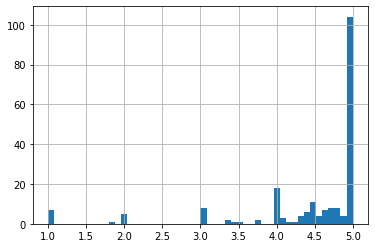

In [82]:
melt_df_mean_rating['rating'].hist(bins=50)

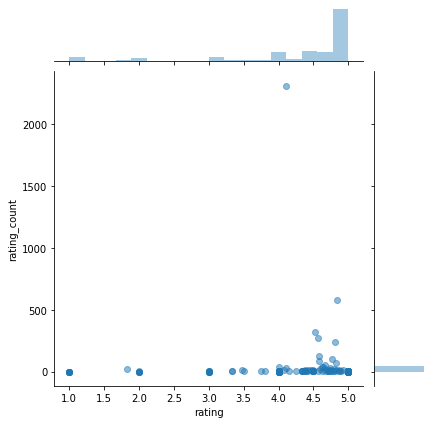

In [85]:
sns.jointplot(x='rating',y='rating_count',data=melt_df_mean_rating,alpha=0.5)

In [30]:
from surprise import Dataset,Reader
from surprise import KNNWithMeans
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split,cross_validate 

In [38]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(melt_df[['user_id','title','rating']],reader=reader)
trainset,testset = train_test_split(data,test_size=0.3,random_state=100)

In [39]:
#algo = KNNWithMeans(k=50,sim_options={'name':'cosine','user_based':False})
algo = SVD()
algo.fit(trainset)

In [40]:
uid = str(196)
sid = str(302)
pred = algo.predict(uid,sid,verbose=True)
pred

user: 196        item: 302        r_ui = None   est = 1.00   {'was_impossible': False}


Prediction(uid='196', iid='302', r_ui=None, est=1, details={'was_impossible': False})

In [41]:
test_pred = algo.test(testset)
test_pred

[Prediction(uid='A1TWTULVD6F22O', iid='Movie30', r_ui=0.0, est=1, details={'was_impossible': False}),
 Prediction(uid='A28MSCTW81UCE6', iid='Movie84', r_ui=0.0, est=1, details={'was_impossible': False}),
 Prediction(uid='A2INFDBYX37AG8', iid='Movie75', r_ui=0.0, est=1, details={'was_impossible': False}),
 Prediction(uid='A3VO5PGHFANZJI', iid='Movie66', r_ui=0.0, est=1, details={'was_impossible': False}),
 Prediction(uid='A226NC1HBYEH97', iid='Movie16', r_ui=0.0, est=1, details={'was_impossible': False}),
 Prediction(uid='A2UQIIJ2CD8REE', iid='Movie113', r_ui=0.0, est=1, details={'was_impossible': False}),
 Prediction(uid='A8RICSNM5RJLW', iid='Movie106', r_ui=0.0, est=1, details={'was_impossible': False}),
 Prediction(uid='A1LP73YAAQHB3Y', iid='Movie173', r_ui=0.0, est=1, details={'was_impossible': False}),
 Prediction(uid='A1EBEQVYPL3OXM', iid='Movie108', r_ui=0.0, est=1, details={'was_impossible': False}),
 Prediction(uid='A3OOCXQFN0GPH1', iid='Movie2', r_ui=0.0, est=1, details={'was_

In [42]:
accuracy.rmse(test_pred,verbose=True)

RMSE: 1.0262


1.026150403744665

In [32]:
cross_validate(algo,data,measures=['RMSE','MAE'],cv=3,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0257  1.0263  1.0264  1.0261  0.0003  
MAE (testset)     1.0119  1.0121  1.0122  1.0121  0.0001  
Fit time          76.42   81.71   80.19   79.44   2.22    
Test time         6.14    8.43    5.50    6.69    1.26    


{'test_rmse': array([1.02566187, 1.02625223, 1.02642146]),
 'test_mae': array([1.01191962, 1.01212316, 1.01217218]),
 'fit_time': (76.4163978099823, 81.70618414878845, 80.18818187713623),
 'test_time': (6.13794469833374, 8.425076961517334, 5.499786138534546)}